In [1]:
import numpy as np
import sympy as sp
import wpp2
import matplotlib.pyplot as plt
import timeit

In [2]:
xf, zf, d1_xf, d1_zf, d2_xf, d2_zf = wpp2.symbolic_matrices(n = 3)
betas = np.linspace(-np.pi, np.pi, 200, endpoint = False)
diffs = wpp2.get_spectrum_grid(betas = betas, xf = xf, zf = zf, plot = False, save_plot = "spectrum_grid.pdf")
locs = wpp2.all_point_finder(xf = xf, zf = zf, d1_xf = d1_xf, d1_zf = d1_zf, d2_xf = d2_xf, d2_zf = d2_zf)
charges = wpp2.weyl_charge_calculator(d1_xf = d1_xf, d1_zf = d1_zf, d2_xf = d2_xf, d2_zf = d2_zf, locs = locs)

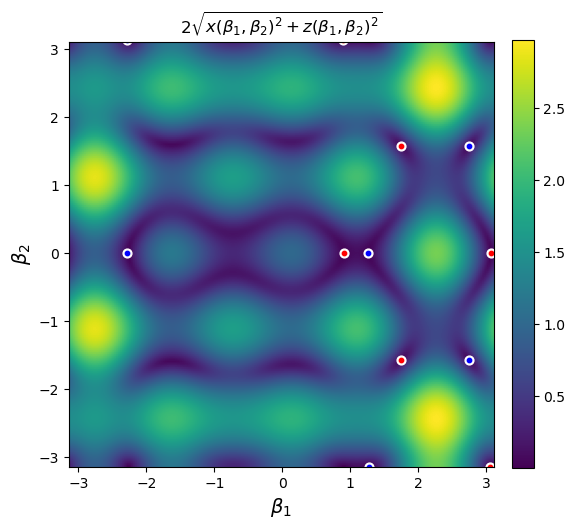

In [3]:
#create figure
fig = plt.figure( figsize = (6,6))

#plot the values (note the ::-1 !)
im = plt.imshow(diffs[::-1, :], extent = [betas[0], betas[-1], betas[0], betas[-1]])

for i in range(len(locs)):
    if charges[i] == 1:
        color = "red"
    else:
        color = "blue"
        
    plt.scatter(locs[i][0], locs[i][1], s = 40, c = "white")
    plt.scatter(locs[i][0], locs[i][1], s = 10, c = color)
#add labels 
plt.xlabel(r"$\beta_1$", fontsize = 14)
plt.ylabel(r"$\beta_2$", fontsize = 14)

plt.ylim([betas[0], betas[-1]])
#add title
plt.title(r"$2 \sqrt{x\left( \beta_1, \beta_2 \right)^2+z\left( \beta_1, \beta_2 \right)^2}$", fontsize = 12)

#rescale the colorbar
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.savefig("spectrum_grid.pdf", dpi = 500, bbox_inches='tight')

In [4]:
len(locs)

12

In [36]:
%%time
numstat = wpp2.obtain_42_wp_configs(number_of_random_systems = 10, n = 3, filename = "tet.txt")

CPU times: user 3.72 s, sys: 3.81 ms, total: 3.73 s
Wall time: 3.73 s
